In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [9]:
# Ruta al shapefile
shapefile = "/home/aninotna/magister/tesis/justh2_pipeline/data/indh_conflicto_sma/02-mapa_conflictos_socioambientales.shp"

# Leer el shapefile
conflictos = gpd.read_file(shapefile)

# Revisar estructura
print(conflictos.head())
print(conflictos.columns)


        id                                             titulo     ano  \
0  29701.0                   Central hidroeléctrica San Pedro  2007.0   
1  28751.0     Conflicto Villa Parque Torreones IV - Valdicor  2018.0   
2     39.0  Contaminación del río Choapa por Mina Los Pela...  2008.0   
3  28754.0          Avenida Circunvalación Humedal Angachilla  2010.0   
4  28756.0  Minicentral Hidroeléctrica Río Mañío, Bosch Ri...  2019.0   

                                           localidad terr_indi  \
0        Los Lagos y Panguipulli, Región de Los Ríos         t   
1                                           Valdivia         f   
2  Illapel, Los Vilos y Salamanca, Región de Coqu...         f   
3                                           Valdivia         f   
4  Sector Los Ñadis, Cayumapu Alto, Bajo y Coihue...         t   

                                             resumen  \
0  En octubre del 2007, la empresa Colbún present...   
1  El presente conflicto se estructura a partir d...

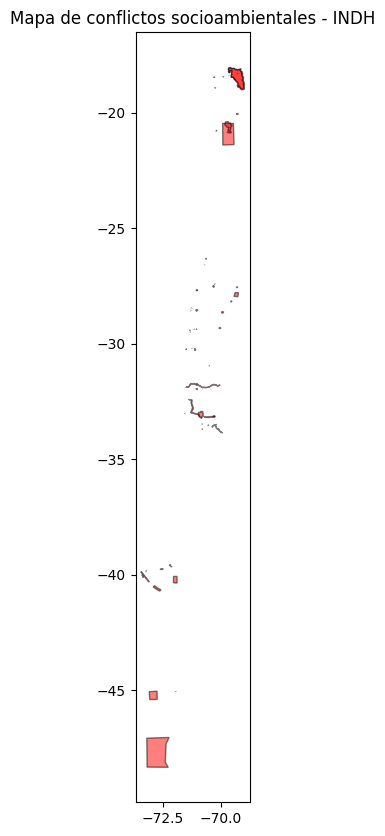

In [10]:
import matplotlib.pyplot as plt

conflictos.plot(
    figsize=(12, 10),
    color="red",
    alpha=0.5,
    edgecolor="black"
)
plt.title("Mapa de conflictos socioambientales - INDH")
plt.show()

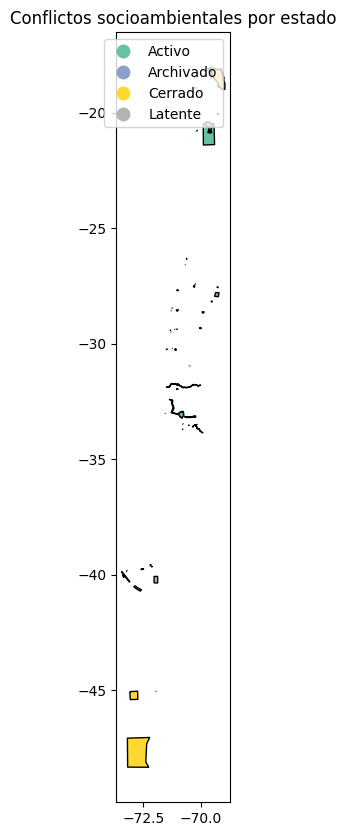

In [11]:
conflictos.plot(
    column="glosa",  # Activo, Cerrado, etc.
    cmap="Set2",
    legend=True,
    figsize=(12, 10),
    edgecolor="black"
)
plt.title("Conflictos socioambientales por estado")
plt.show()


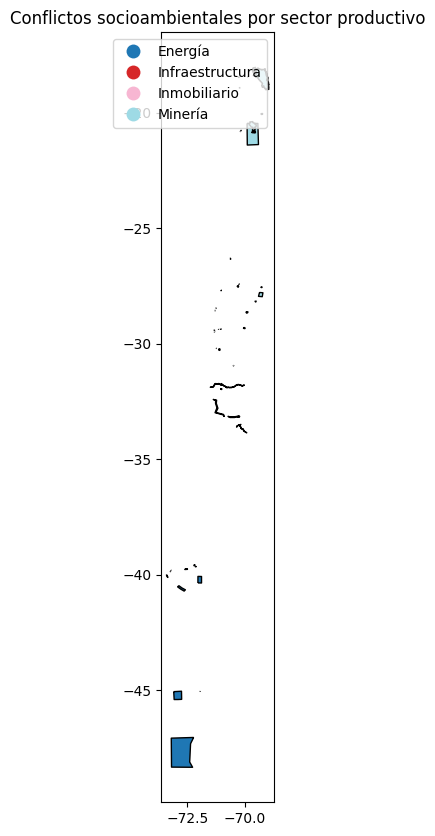

In [12]:
# Ejemplo: diccionario de códigos -> nombre (ajustar con tu metadata real)
sectores = {
    2.0: "Energía",
    4.0: "Infraestructura",
    9.0: "Minería",
    7802.0: "Inmobiliario"
}

conflictos["sector_nombre"] = conflictos["sect_prod"].map(sectores)

conflictos.plot(
    column="sector_nombre",
    cmap="tab20",
    legend=True,
    figsize=(12, 10),
    edgecolor="black"
)
plt.title("Conflictos socioambientales por sector productivo")
plt.show()


In [13]:
print(conflictos["glosa"].value_counts())         # Activos vs Cerrados
print(conflictos["sector_nombre"].value_counts()) # Sectores más conflictivos
print(conflictos["ano"].describe())               # Distribución temporal


glosa
Activo       74
Latente      33
Archivado    31
Cerrado      24
Name: count, dtype: int64
sector_nombre
Energía            60
Minería            46
Infraestructura     5
Inmobiliario        1
Name: count, dtype: int64
count     162.000000
mean     2007.475309
std         9.934069
min      1938.000000
25%      2006.000000
50%      2009.000000
75%      2013.000000
max      2019.000000
Name: ano, dtype: float64
